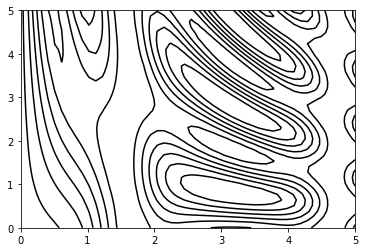

In [28]:
x = np.linspace(0, 5, 50)
y= np.linspace(0, 5, 40)
X, Y = np.meshgrid(x,y)
Z = f(X, Y)
plt.contour(X, Y, Z, colors='black')

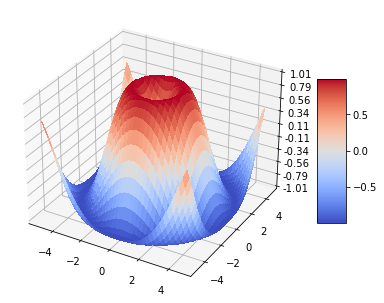

In [51]:

fig = plt.figure()
ax = Axes3D(fig)# ax = Axes3D(fig)
# Make data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X,Y = np.meshgrid(X,Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface
surf = ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=0,antialiased=False)

# Customize the z axis
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [2]:
def f(x,y):
     return np.sin(x) ** 10 + 10 + np.cos(10 +y * x) * np.cos(x)

# Práctica 1: Regresión lineal

#### Realizado por Javier Gómez Moraleda y Unai Piris Ibañez

### Imports

In [39]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt

### Carga de los datos

In [40]:
def carga_csv(file_name):
    valores = read_csv (file_name , header=None).to_numpy()
    return valores.astype(float)

In [41]:
datos = carga_csv('ex1data1.csv')

## Parte 1: Regresión lineal sobre una variable

## Solución iterativa

In [42]:
def descenso_gradiente(X, Y, alpha, theta_0, theta_1):
    
    m = len(X)
    
    #iteracion para minimizar el coste
    for _ in range(1500):
        
        sum_0 = sum_1 = 0
        
        for i in range(m):
            sum_0 += (theta_0 + theta_1 * X[i]) - Y[i]
            sum_1 += ((theta_0 + theta_1 * X[i]) - Y[i]) * X[i]
        
                
        theta_0 = theta_0 - (alpha / m) * sum_0
        theta_1 = theta_1 - (alpha / m) * sum_1
    
    #pinta la grafica
    plt.plot(X, Y, "x",c='red')
    min_x = min(X)
    max_x = max (X)
    min_y = theta_0 + theta_1 * min_x
    max_y = theta_0 + theta_1 * max_x
    plt.plot([min_x, max_x], [min_y, max_y])
    #plt.savefig("resultado.pdf")
    #print( 'x = ', 7 , 'y = ', theta_0 + theta_1 * 7)

    #plt.figure()
    
    return theta_0, theta_1

In [43]:
def hipotesis(x, theta0, theta1):
    return theta0 + theta1 * x

In [44]:
def coste(X, Y, theta0, theta1):
    sumatorio = 0
    for i in range(len(X)):
        sumatorio += (hipotesis(X[i], theta0, theta1) - Y[i])**2
    return sumatorio

Theta0: -3.63029143940436
Theta1: 1.166362350335582
Coste:  869.777321778019


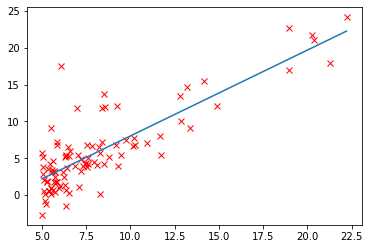

In [45]:
# Aplicamos descenso de gradiente a los datos
theta0 = theta1 = 0
alpha = 0.01
X = datos[:, 0]
Y = datos [:, 1]
theta0, theta1 = descenso_gradiente(X, Y, alpha, theta0, theta1)

print("Theta0: " + str(theta0))
print("Theta1: " + str(theta1))
print("Coste: ", coste(X, Y, theta0, theta1))

In [52]:
step = 0.1
Theta0 = np.arange(-10, 10, step)
Theta1 = np.arange(-1, 4, step)
Theta0, Theta1 = np.meshgrid(Theta0, Theta1)

Z = np.empty_like(Theta0)

for i in range(len(Theta0)):
    aux = []
    for j in range(len(Theta0[i])):
        aux.append(coste(X[i], Y[i], Theta0[i, j], Theta1[i, j]))
    
    Z[i] = aux

print("X: ", X)
print("Y: ", Y)
print("Z: ", Z)
    
'''

fig = plt.figure()
ax = Axes3D(fig)# ax = Axes3D(fig)

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)

X,Y = np.meshgrid(X,Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

print("X: ", X)
print("Y: ", Y)
print("R: ", R)
print("Z", Z)


# Plot the surface
surf = ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=0,antialiased=False)

# Customize the z axis
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
'''

TypeError: object of type 'numpy.float64' has no len()

## Solución vectorizada

In [46]:
X = datos[:, :-1]
Y = datos[:, -1]

m = np.shape(X)[0]
n = np.shape(X)[1]

X = np.hstack([np.ones([m,1]), X])

alpha = 0.01
Thetas, costes = descenso_gradiente(X,Y,alpha)



[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

In [ ]:
def costeVec(m,X,Y):
    sumatorio = 0
    for i in range(m):
        sumatorio += (hipotesis(X[i])-Y[i])**2
    return sumatorio
     

## parte 2